In [9]:
import numpy as np 
from matplotlib import pyplot as plt
from os import sys
from ipywidgets import interact, IntSlider

In [10]:
sys.path.append('../')
import gridemic

In [11]:
SEIIRT = gridemic.Model(seed_random = 1, N = 50, tauW = 0.175, etaW = 0.175, 
                 tauS = 0.175, etaS = 0.175, prob_trace = 0.75, prob_detect=0.75,
                 num_tests = 5)
basic_reproduction_number = SEIIRT.reproduction_number()
SEIIRT.add_infectious()

In [12]:
basic_reproduction_number

2.288239372854095

In [13]:
t_final = 200

figures = []

population = np.zeros((t_final + 1, 6))

while SEIIRT.time <= t_final:
    fig = plt.figure(figsize=(12, 9))
    ax = fig.gca()

    ax = SEIIRT.visualize_population(ax)
    ax.set_title(f'Day {SEIIRT.time}')
    figures.append(fig)
    plt.close()

    population[SEIIRT.time, 0] = np.sum(SEIIRT.disease_state==0) # S
    population[SEIIRT.time, 1] = np.sum(SEIIRT.disease_state==1) # E
    population[SEIIRT.time, 2] = np.sum(SEIIRT.disease_state==2) # I_w
    population[SEIIRT.time, 3] = np.sum(SEIIRT.disease_state==3) # I_s
    population[SEIIRT.time, 4] = np.sum(SEIIRT.disease_state==4) # I_R
    population[SEIIRT.time, 5] = (np.sum(SEIIRT.testing_state==3) 
                        + np.sum(SEIIRT.testing_state==4)) # cases   

    SEIIRT.evolve()


../gridemic.py:180: UserWarning: Use the colorbar set_ticks() method instead.
  cbar.ax.set_yticks([0, 1, 2, 3, 4])
../gridemic.py:181: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['$S$', '$E$', '$I_W$', '$I_S$', '$R$'])
../gridemic.py:184: UserWarning: No contour levels were found within the data range.
  ax.contour(self.testing_state, [1, 2, 3, 4])


In [14]:
def show_population(day):
    return figures[day]

In [15]:
interact(show_population, day = IntSlider(min = 0, max = t_final, step = 1, value = 0))

interactive(children=(IntSlider(value=0, description='day', max=200), Output()), _dom_classes=('widget-interac…

<function __main__.show_population(day)>

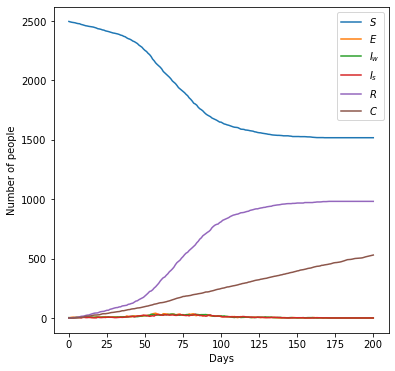

In [16]:
fig_pop = plt.figure(figsize = (6, 6))
ax = fig_pop.gca()
ax.plot(population[:, 0], label='$S$')
ax.plot(population[:, 1], label='$E$')
ax.plot(population[:, 2], label='$I_w$')
ax.plot(population[:, 3], label='$I_s$')
ax.plot(population[:, 4], label='$R$')
ax.plot(population[:, 5], label='$C$')
ax.set_xlabel('Days')
ax.set_ylabel('Number of people')
ax.legend()